## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II
Objective: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [44]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt



In [38]:
Data = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df = Data.copy()
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


### Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

#### 1. Crosstab Analysis

- Create a crosstab between the product category and the isBestSeller status.

- Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.


<span style="color:purple">MY NOTE: "Crosstab analysis (cross-tabulation) is a statistical method used to examine the relationship between two or more categorical variables by displaying their frequency distribution in a matrix format."</span>


In [39]:
# crosstab_sorted = pd.crosstab(df['category'], df['isBestSeller'], normalize='index') # standard crosstab
df_crosstab_proportion = pd.crosstab(df['category'], df['isBestSeller'], normalize='index') # use normalize to get the proportion

df_crosstab_proportion

isBestSeller,False,True
category,,
3D Printers,0.995968,0.004032
3D Printing & Scanning,0.999508,0.000492
Abrasive & Finishing Products,0.980000,0.020000
Action Cameras,0.999411,0.000589
Adapters,0.988189,0.011811
...,...,...
Wind Instruments,0.972000,0.028000
Window Treatments,0.979079,0.020921
Women,0.988015,0.011985


In [40]:
df_crosstab_sorted = df_crosstab_proportion.sort_values(by=True, ascending=False)

df_crosstab_sorted

isBestSeller,False,True
category,,
Grocery,0.941865,0.058135
Smart Home Security & Lighting,0.942308,0.057692
Health & Personal Care,0.942314,0.057686
Mobile Phone Accessories,0.957529,0.042471
Power & Hand Tools,0.964661,0.035339
...,...,...
"CD, Disc & Tape Players",1.000000,0.000000
General Music-Making Accessories,1.000000,0.000000
Snowboard Boots,1.000000,0.000000


In [41]:
# "Grocery" has the most best-sellers proportionally

#### 2. Statistical Tests:

- Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
- Compute Cramér's V to understand the strength of association between best-seller status and category.


In [42]:
# Chi-square test

crosstab = pd.crosstab(df['category'], df['isBestSeller'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(crosstab)


print(f"p-value: {p_value}")

p-value: 0.0


In [47]:
# Cramer'S V

n = crosstab.sum().sum()  # Total sample size
min_dim = min(crosstab.shape) - 1  # Minimum of (rows - 1) or (columns - 1)

cramers_v = np.sqrt(chi2_stat / (n * min_dim))


print(f"cramers_v: {cramers_v}")




cramers_v: 0.1222829439760564


In [ ]:
# Result

# cramers_v = 0.1222829439760564 ------> 0.1 to 0.3 -------> Moderate association


#### 3. Visualizations:

- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.


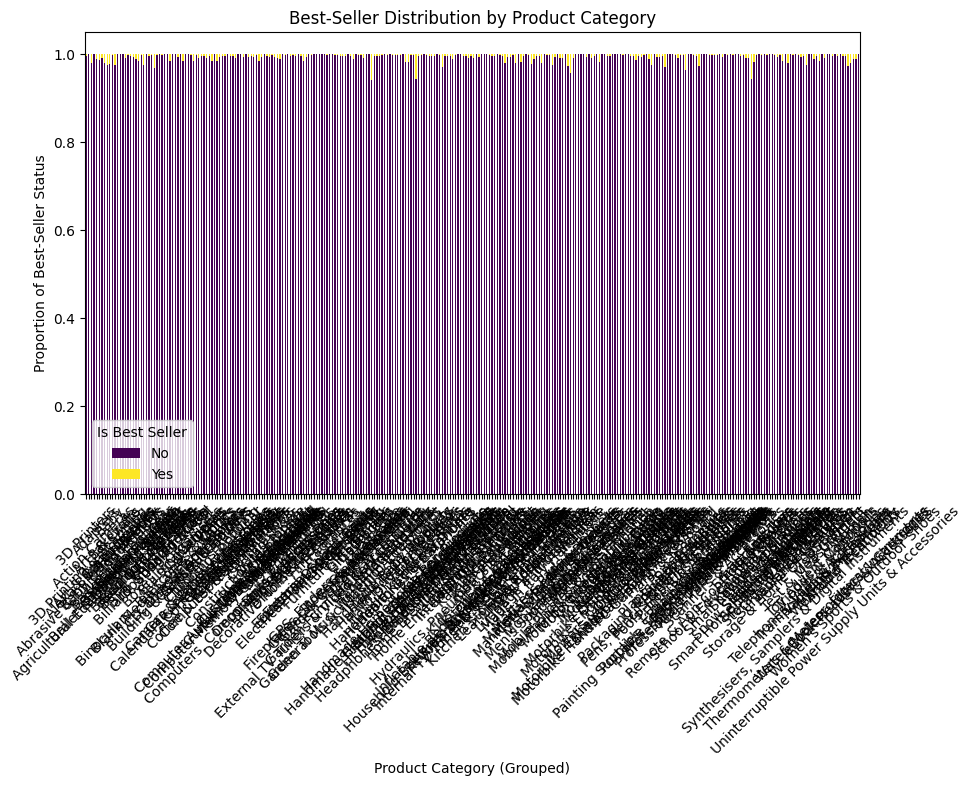

In [ ]:


# Count products per category
category_counts = df['category'].value_counts()

# Set a threshold (e.g., categories with fewer than 5 products are grouped into "Other")
threshold = 5
top_categories = category_counts[category_counts >= threshold].index

# Replace rare categories with "Other"
df['category_grouped'] = df['category'].apply(lambda x: x if x in top_categories else "Other")

# Create a new crosstab with grouped categories
crosstab_grouped = pd.crosstab(df['category_grouped'], df['isBestSeller'], normalize='index')

# Plot the stacked bar chart
ax = crosstab_grouped.plot(kind='bar', stacked=True, figsize=(10,6), colormap="viridis")

# Add labels and title
plt.xlabel("Product Category (Grouped)")
plt.ylabel("Proportion of Best-Seller Status")
plt.title("Best-Seller Distribution by Product Category")
plt.legend(title="Is Best Seller", labels=["No", "Yes"])
plt.xticks(rotation=45)

# Show the plot
plt.show()
